In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model, layers
from glob import glob
from PIL import Image
import os
import zipfile
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential

os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)
# GPU 할당 상태 확인

tf.test.is_gpu_available()


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [2]:
!nvidia-smi

Mon Jun 13 07:28:30 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 440.82       CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 108...  Off  | 00000000:03:00.0 Off |                  N/A |
| 28%   48C    P2    58W / 250W |    259MiB / 11176MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 108...  Off  | 00000000:04:00.0 Off |                  N/A |
| 25%   44C    P2    58W / 250W |    259MiB / 11178MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
        

In [3]:
image_dates_train_nak = glob('./train/1*.jpg')
image_dates_train_scub = glob('./train/2*.jpg')
image_dates_train_oster = glob('./train/3*.jpg')
image_dates_train_hou = glob('./train/4*.jpg')
image_dates_train_gravy = glob('./train/5*.jpg')
image_dates_train_jung = glob('./train/6*.jpg')
image_dates_train_edong = glob('./train/7*.jpg')
image_dates_train_hwan = glob('./train/8*.jpg')
image_dates_train_bad = glob('./train/9*.jpg')
image_dates_train_shshi = glob('./train/10*.jpg')
image_dates_train_ugo = glob('./train/11*.jpg')



image_dates_valid_nak = glob('./valid/1*.jpg')
image_dates_valid_scub = glob('./valid/2*.jpg')
image_dates_valid_oster = glob('./valid/3*.jpg')
image_dates_valid_hou   = glob('./valid/4*.jpg')
image_dates_valid_gravy = glob('./valid/5*.jpg')
image_dates_valid_jung  = glob('./valid/6*.jpg')
image_dates_valid_edong = glob('./valid/7*.jpg')
image_dates_valid_hwan  = glob('./valid/8*.jpg')
image_dates_valid_bad   = glob('./valid/9*.jpg')
image_dates_valid_shshi = glob('./valid/10*.jpg')
image_dates_valid_ugo   = glob('./valid/11*.jpg')


image_dates_test_nak = glob('./test/1*.jpg')
image_dates_test_scub = glob('./test/2*.jpg')
image_dates_test_oster = glob('./test/3*.jpg')
image_dates_test_hou   = glob('./test/4*.jpg')
image_dates_test_gravy = glob('./test/5*.jpg')
image_dates_test_jung  = glob('./test/6*.jpg')
image_dates_test_edong = glob('./test/7*.jpg')
image_dates_test_hwan  = glob('./test/8*.jpg')
image_dates_test_bad   = glob('./test/9*.jpg')
image_dates_test_shshi = glob('./test/10*.jpg')
image_dates_test_ugo   = glob('./test/11*.jpg')


class_name = ['1_nakseong', '2_scuba', '3_osteria', '4_hou_skewer', '5_gravy',
           '6_jungga',  '7_edong_gan', '8_hwanyeo', '9_badarang', '10_sushi_mura',
           '11_ugo']
dic = {'1_nakseong' : 0, '2_scuba' : 1, '3_osteria' : 2, '4_hou_skewer' : 3, '5_gravy' : 4, 
       '6_jungga' : 5, '7_edong_gan' : 6, '8_hwanyeo' : 7, '9_badarang' : 8, '10_sushi_mura' : 9,
       '11_ugo' : 10}

X_train = []
Y_train = []
X_valid = []
Y_valid = []
X_test = []
Y_test = []

## Train Set
for imagename in image_dates_train_nak:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_train.append(image)
    Y_train.append(0)
    
for imagename in image_dates_train_scub:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_train.append(image)
    Y_train.append(1)    
    
for imagename in image_dates_train_oster:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_train.append(image)
    Y_train.append(2)
    
for imagename in image_dates_train_hou:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_train.append(image)
    Y_train.append(3)
    
for imagename in image_dates_train_gravy:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_train.append(image)
    Y_train.append(4)
    
for imagename in image_dates_train_jung:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_train.append(image)
    Y_train.append(5)
    
for imagename in image_dates_train_edong:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_train.append(image)
    Y_train.append(6)
    
for imagename in image_dates_train_hwan:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_train.append(image)
    Y_train.append(7)
    
for imagename in image_dates_train_bad:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_train.append(image)
    Y_train.append(8)
    
for imagename in image_dates_train_shshi:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_train.append(image)
    Y_train.append(9)
    
for imagename in image_dates_train_ugo:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_train.append(image)
    Y_train.append(10)

## Valid Set
    
for imagename in image_dates_valid_nak:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_valid.append(image)
    Y_valid.append(0)
    
for imagename in image_dates_valid_scub:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_valid.append(image)
    Y_valid.append(1)    
    
for imagename in image_dates_valid_oster:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_valid.append(image)
    Y_valid.append(2)
    
for imagename in image_dates_valid_hou:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_valid.append(image)
    Y_valid.append(3)
    
for imagename in image_dates_valid_gravy:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_valid.append(image)
    Y_valid.append(4)
    
for imagename in image_dates_valid_jung:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_valid.append(image)
    Y_valid.append(5)
    
for imagename in image_dates_valid_edong:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_valid.append(image)
    Y_valid.append(6)
    
for imagename in image_dates_valid_hwan:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_valid.append(image)
    Y_valid.append(7)
    
for imagename in image_dates_valid_bad:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_valid.append(image)
    Y_valid.append(8)
    
for imagename in image_dates_valid_shshi:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_valid.append(image)
    Y_valid.append(9)
    
for imagename in image_dates_valid_ugo:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_valid.append(image)
    Y_valid.append(10)
    
    
## Test Set
    
for imagename in image_dates_test_nak:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_test.append(image)
    Y_test.append(0)
    
for imagename in image_dates_test_scub:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_test.append(image)
    Y_test.append(1)    
    
for imagename in image_dates_test_oster:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_test.append(image)
    Y_test.append(2)

for imagename in image_dates_test_hou:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_test.append(image)
    Y_test.append(3)

for imagename in image_dates_test_gravy:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_test.append(image)
    Y_test.append(4)

for imagename in image_dates_test_jung:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_test.append(image)
    Y_test.append(5)
    
for imagename in image_dates_test_edong:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_test.append(image)
    Y_test.append(6)
    
for imagename in image_dates_test_hwan:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_test.append(image)
    Y_test.append(7)
    
for imagename in image_dates_test_bad:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_test.append(image)
    Y_test.append(8)
    
for imagename in image_dates_test_shshi:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_test.append(image)
    Y_test.append(9)
    
for imagename in image_dates_test_ugo:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_test.append(image)
    Y_test.append(10)
    
## Array 변환
    
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_valid = np.array(X_valid)
Y_valid = np.array(Y_valid)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

print(X_train.shape, Y_train.shape)
print(X_valid.shape, Y_valid.shape)
print(X_test.shape, Y_test.shape)

(39780, 200, 200, 3) (39780,)
(13260, 200, 200, 3) (13260,)
(10778, 200, 200, 3) (10778,)


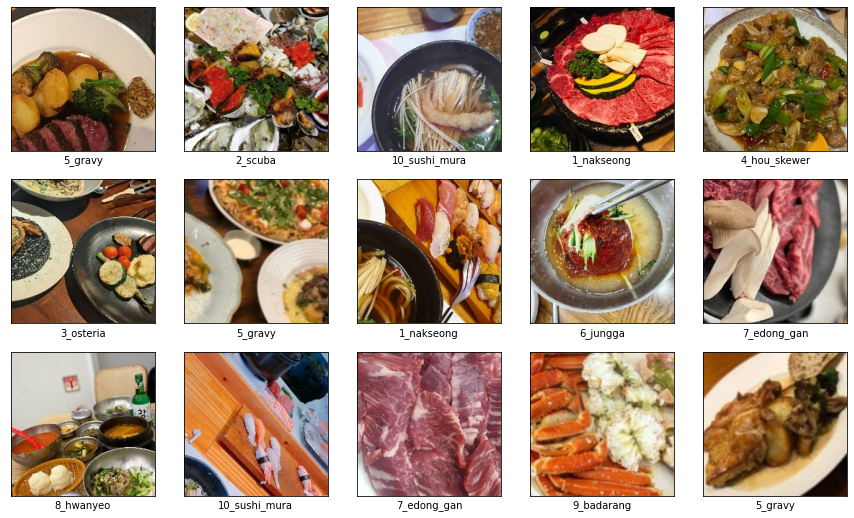

In [4]:
# train_images, test_images, train_labels, test_labels = train_test_split(X, Y, test_size = 0.2, shuffle = True, random_state = 44)

# print(train_images.shape, test_images.shape)
# print(train_labels.shape, test_labels.shape)
%matplotlib inline 
N_TRAIN = X_train.shape[0]
N_TEST = X_valid.shape[0]

plt.figure(figsize = (15, 9))

# train data image 확인

for i in range(15):
    img_idx = np.random.randint(0, N_TRAIN)
    plt.subplot(3, 5, i+1)
    plt.xticks([])
    plt.yticks([])    
    plt.grid(False)
    plt.imshow(X_train[img_idx])
    plt.xlabel(class_name[Y_train[img_idx]])

In [5]:
#min-max scaling

X_train = X_train.astype(np.float32) / 255
X_valid = X_valid.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255

x_train = X_train.reshape(-1, 200, 200, 3)
x_valid = X_valid.reshape(-1, 200, 200, 3)
x_test = X_test.reshape(-1, 200, 200, 3)

y_train = Y_train
y_test = Y_test
y_valid = Y_valid


print('train data : X ', x_train.shape, ' Y ', y_train.shape)
print('valid data : X ', x_valid.shape, ' Y ', y_valid.shape)
print('test data : X ', x_test.shape, ' Y ', y_test.shape)

train data : X  (39780, 200, 200, 3)  Y  (39780,)
valid data : X  (13260, 200, 200, 3)  Y  (13260,)
test data : X  (10778, 200, 200, 3)  Y  (10778,)


### Xception

In [6]:
from tensorflow.keras.applications import Xception

Xception_base = Xception(weights='imagenet',
                 include_top=False,        # class 3개로 분류 학습시켜야 해서 레이어 분리시킨 후, Desnse(3) 추가..?
                 input_shape=(200, 200, 3))

Xception_base.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 99, 99, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 99, 99, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 99, 99, 32)   0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [7]:
from tensorflow.keras import models
from tensorflow.keras import layers
model_Xception = models.Sequential()
model_Xception.add(Xception_base)
model_Xception.add(layers.Flatten())
model_Xception.add(layers.Dense(256, activation='relu'))
model_Xception.add(layers.Dense(3, activation='sigmoid'))
Xception_base.trainable = False
model_Xception.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               25690368  
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 771       
Total params: 46,552,619
Trainable params: 25,691,139
Non-trainable params: 20,861,480
_________________________________________________________________


In [ ]:
model_Xception.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

hist_Xception = model_Xception.fit(x_train, y_train, epochs=10, batch_size=200, validation_data=(x_valid, y_valid))

In [10]:
test_result = model_Xception.evaluate(x_test, y_test)
print('test loss: ', test_result[0])
print('test acc: ', test_result[1])


96/96 [==============================] - 6s 63ms/step - loss: 0.0290 - accuracy: 0.9899
test loss:  0.029025878757238388
test acc:  0.9898692965507507


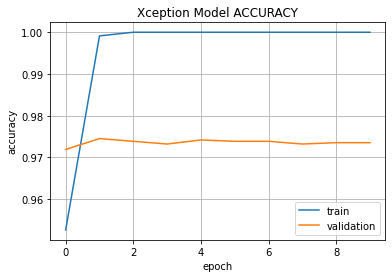

In [11]:
plt.plot(hist_Xception.history['accuracy'])
plt.plot(hist_Xception.history['val_accuracy'])
plt.title('Xception Model ACCURACY')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.grid()
plt.legend(['train','validation'], loc = 'best')

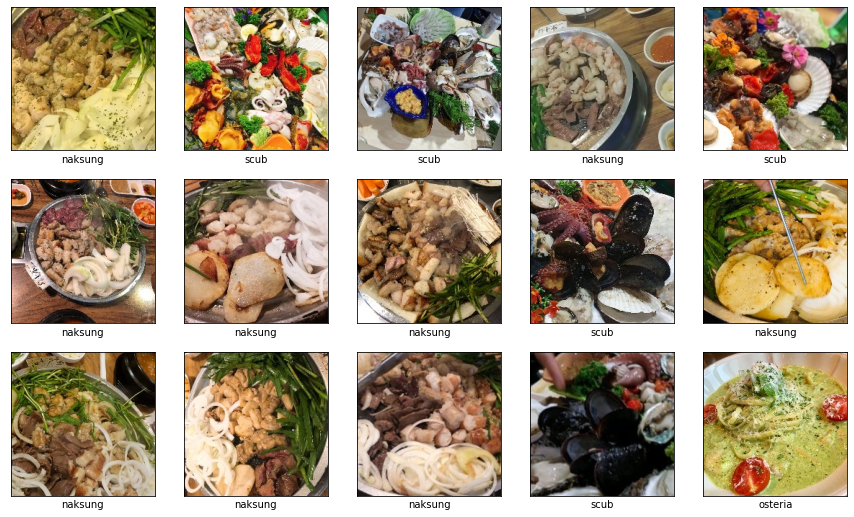

In [12]:
# 학습 결과 labeling
plt.figure(figsize = (15, 9))
for i in range(15):
    img_idx = np.random.randint(0, N_TEST)
    im = np.reshape(x_test[img_idx], (-1, 200, 200, 3))
    classnum = np.argmax(model_Xception.predict(im))
    plt.subplot(3, 5, i+1)
    plt.xticks([])
    plt.yticks([])    
    plt.grid(False)
    plt.imshow(x_test[img_idx])
    name = ''
    if classnum == 0 : name = 'naksung'
    elif classnum == 1 : name = 'scub'
    else : name = 'osteria'
    plt.xlabel(name)

### InceptionResNetV2

In [ ]:
from tensorflow.keras.applications import InceptionResNetV2

InceptionResNetV2_base = InceptionResNetV2(weights='imagenet',
                         include_top=False,        # class 3개로 분류 학습시켜야 해서 레이어 분리시킨 후, Desnse(3) 추가..?
                         input_shape=(200, 200, 3))

InceptionResNetV2_base.summary()



In [ ]:
model_InceptionResNetV2 = models.Sequential()
model_InceptionResNetV2.add(InceptionResNetV2_base)
model_InceptionResNetV2.add(layers.Flatten())
model_InceptionResNetV2.add(layers.Dense(256, activation='relu'))
model_InceptionResNetV2.add(layers.Dense(3, activation='sigmoid'))
InceptionResNetV2_base.trainable = False
model_InceptionResNetV2.summary()

In [ ]:
model_InceptionResNetV2.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

hist_InceptionResNetV2 = model_InceptionResNetV2.fit(x_train, y_train, epochs=10, batch_size=200, validation_data=(x_valid, y_valid))

test_result = model_InceptionResNetV2.evaluate(x_test, y_test)
print('test loss: ', test_result[0])
print('test acc: ', test_result[1])


plt.plot(hist_InceptionResNetV2.history['accuracy'])
plt.plot(hist_InceptionResNetV2.history['val_accuracy'])
plt.title('InceptionResNetV2 Model ACCURACY')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.grid()
plt.legend(['train','validation'], loc = 'best')

In [ ]:
# 학습 결과 labeling
plt.figure(figsize = (15, 9))
for i in range(15):
    img_idx = np.random.randint(0, N_TEST)
    im = np.reshape(x_test[img_idx], (-1, 200, 200, 3))
    classnum = np.argmax(model_InceptionResNetV2.predict(im))
    plt.subplot(3, 5, i+1)
    plt.xticks([])
    plt.yticks([])    
    plt.grid(False)
    plt.imshow(x_test[img_idx])
    name = ''
    if classnum == 0 : name = 'naksung'
    elif classnum == 1 : name = 'scub'
    else : name = 'osteria'
    plt.xlabel(name)